En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).


El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning.

Para eso recordad que:

- Deberéis separar la X y la y.

- Deberéis crear el train y el test.

- Ajustar vuestro modelo.


In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


In [4]:
df = pd.read_csv("data/adults_encoding.csv", index_col = 0)
df.head()

,final_weight,education_yrs,capital_gain,capital_lost,hours_week,final_weight_log,gender_map,census_map,salary_map,relationship_ Husband,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
39,,,,,,,,,,,,,,,,,,,,,
50,83311,-0.333333,0.0,0.0,-2.0,11.330336,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38,215646,0.666667,0.0,0.0,0.0,12.281393,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53,234721,-0.333333,0.0,0.0,4.0,12.366153,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
28,338409,-0.333333,0.0,0.0,0.0,12.732011,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,284582,0.000000,0.0,0.0,-0.4,12.558777,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Nos cargamos la columna final_weight por no saber que hacer con ella, de momento, repasar luego pairs desde principio
#no esta estandarizzada ni normalizzada ya que en principio era nuestra predictora, que ahora es el salary.

In [ ]:
#df.drop("final_weight", axis =1, inplace = True)

: 

In [6]:
#Comprobamos el cambio 
df.head()

,education_yrs,capital_gain,capital_lost,hours_week,final_weight_log,gender_map,census_map,salary_map,relationship_ Husband,relationship_ Not-in-family,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
39,,,,,,,,,,,,,,,,,,,,,
50,-0.333333,0.0,0.0,-2.0,11.330336,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
38,0.666667,0.0,0.0,0.0,12.281393,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53,-0.333333,0.0,0.0,4.0,12.366153,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28,-0.333333,0.0,0.0,0.0,12.732011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0.000000,0.0,0.0,-0.4,12.558777,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
X = df.drop("salary_map", axis = 1)
y = df["salary_map"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#iniciamos el modelo 
lr = LinearRegression()

In [13]:
#entrenamos el modelo 
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
# Realizamos las predicciones con nuestro modelo
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [15]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
39,,,
20,0,-0.015923,Train
21,0,-0.061416,Train
64,0,0.271105,Train
26,0,0.110189,Train
21,0,0.268951,Train


In [19]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(20)

,Real,Predicted,Set,residuos
39,,,,
33,0,-0.125457,Test,0.125457
52,0,-0.056033,Train,0.056033
60,0,0.030852,Train,-0.030852
42,0,0.334322,Test,-0.334322
26,0,-0.087780,Train,0.087780
42,0,0.064424,Train,-0.064424
38,0,0.214350,Train,-0.214350
38,0,0.315510,Train,-0.315510
25,0,-0.054038,Train,0.054038


KeyboardInterrupt: 

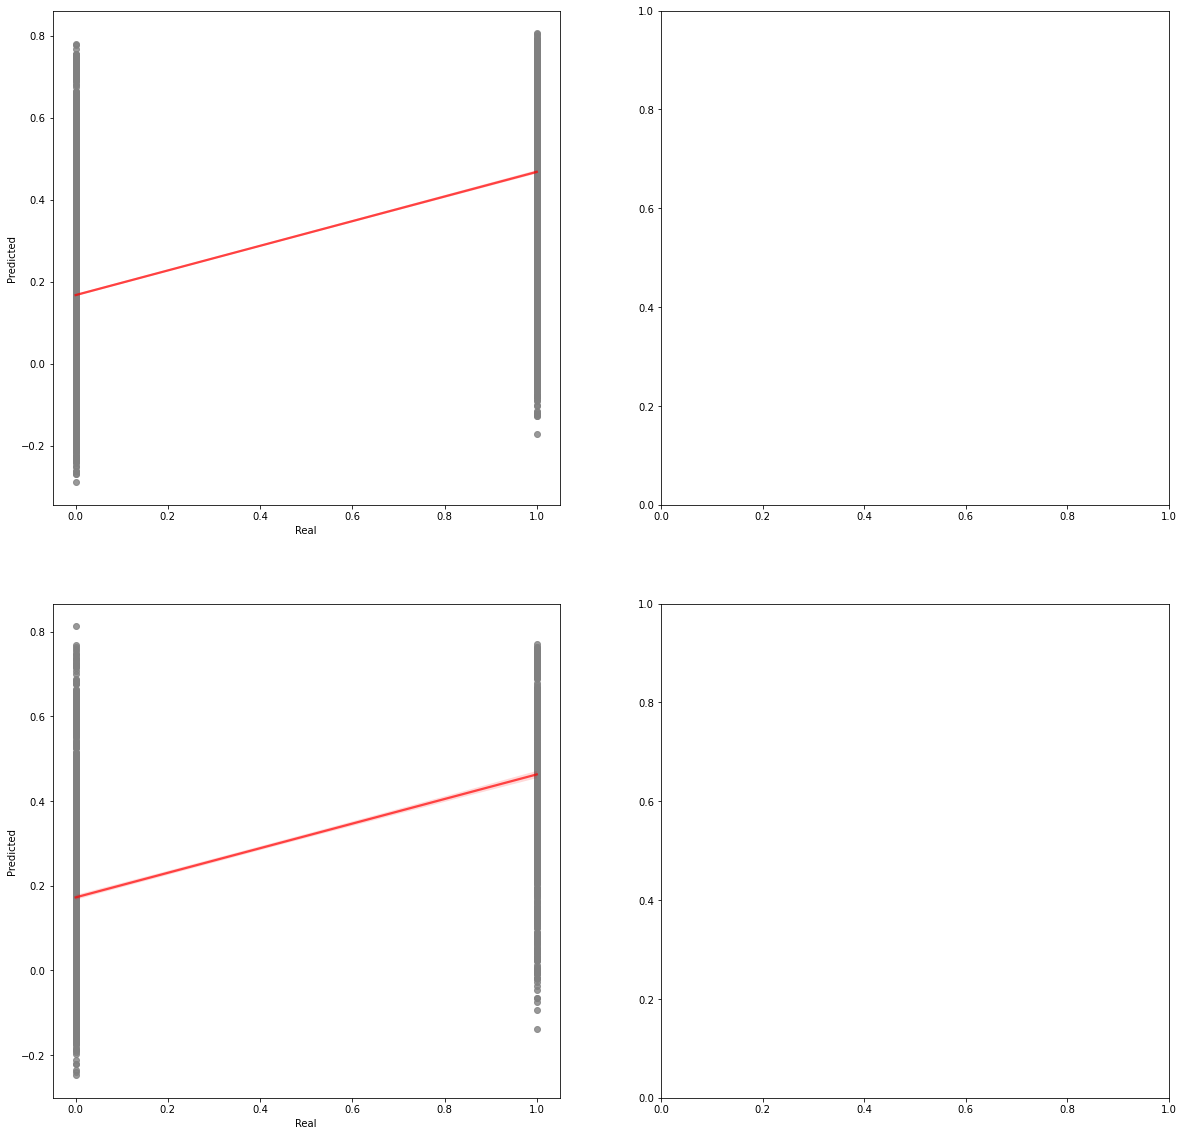

In [24]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])



sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [21]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
                estimator = LinearRegression(), # que algoritmo  queremos usar para ajustar el modelo
                X         = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
                y         = y, # cual es nuestra variable y
                scoring   = 'neg_root_mean_squared_error', # que métrica queremos calcular
                cv        = 10 # número de veces que queremos hacer la validación
             )

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-0.35753907 -0.35714087 -0.3587068  -0.3644234  -0.35930285 -0.35830076
 -0.3550935  -0.3604016  -0.35610099 -0.3622866 ]
Média métricas de validación cruzada: -0.3589296447438275


In [22]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.081423,0.007487,0.315971,-0.357539
1,0.072485,0.004780,0.288465,-0.357141
2,0.074810,0.004763,0.274219,-0.358707
3,0.078779,0.004783,0.278535,-0.364423
4,0.074796,0.004538,0.293187,-0.359303
5,0.075678,0.004598,0.286431,-0.358301
6,0.074089,0.004791,0.304157,-0.355094
7,0.071390,0.004118,0.301501,-0.360402
8,0.079990,0.005136,0.313458,-0.356101
9,0.076397,0.003948,0.294175,-0.362287


In [23]:
print(f'la media para el r2 es {cv_scores["test_r2"].mean().round(2)}')
print(f'la media para el RMSE es {abs(cv_scores["test_neg_root_mean_squared_error"].mean()).round(2)}')

la media para el r2 es 0.3
la media para el RMSE es 0.36
